In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tess_sip import SIP
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.print_figure_kwargs={"facecolor" : "w"}

In [29]:
t, f, f_err = np.genfromtxt(
    "/home/mango/Desktop/WASP50LC_ASASSN.txt",
    unpack=True,
    delimiter=',',
    skip_header=True,
)

<ErrorbarContainer object of 3 artists>

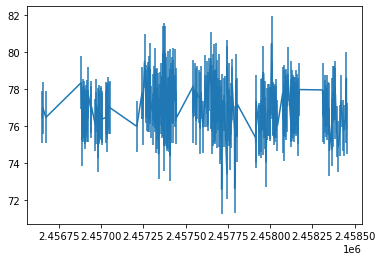

In [30]:
plt.errorbar(t, f, f_err)

5.211678832116857 d 5003.8145313782625


/home/mango/miniconda3/envs/WASP50/lib/python3.9/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


array([ 8.18163696,  8.94600618, 10.66355903])

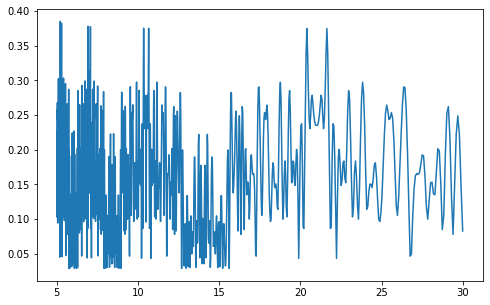

In [257]:
f_med = np.median(f)
lc = lk.LightCurve(time=t - 2.457e6, flux=1e6*(f - f_med)/f_med)
#lc = lk.LightCurve(time=t - 2.457e6, flux=f, flux_err=f_err)
lc_binned = lc.bin(time_bin_size=21)

fig, ax = plt.subplots(figsize=(8, 5))
#lc.errorbar(ax=ax)
#lc_binned.errorbar(ax=ax, fmt='o')

pg = lc_binned.to_periodogram(minimum_period=5, maximum_period=30)

plt.plot(pg.period, pg.power * f_med/1e6)
#pg.plot()
print(pg.period_at_max_power, pg.max_power)
probabilities = [0.1, 0.05, 0.01]
pg._LS_object.false_alarm_level(probabilities)

In [263]:
lcs[0].time.jd

array([2458410.95353153, 2458411.01603288, 2458411.03686666, ...,
       2458436.78677188, 2458436.80760472, 2458436.82843757])

In [ ]:
tpfs = lk.search_targetpixelfile("WASP50", author="TESS-SPOC").download_all()

In [ ]:
[tpf.plot(aperture_mask="pipeline") for tpf in tpfs]

In [149]:
srs = lk.search_lightcurve("WASP50", author="TESS-SPOC")
display(srs)
lcs = srs.download_all()
#r = SIP(lcs, **sip_kwargs)

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 04,2018,TESS-SPOC,1800,382391899,0.0
1,TESS Sector 31,2020,TESS-SPOC,600,382391899,0.0


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

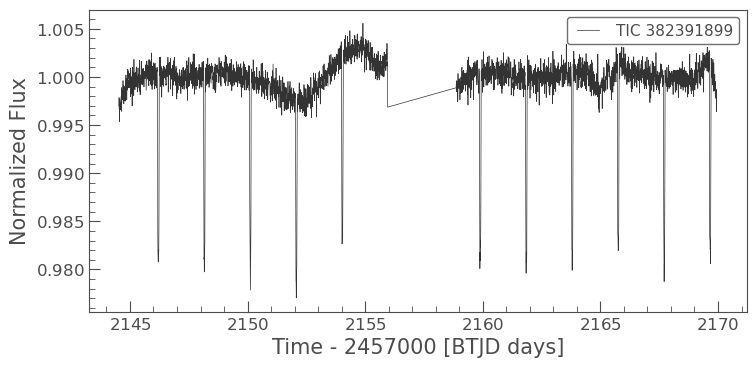

In [262]:
lcs[1].remove_nans().normalize().plot()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

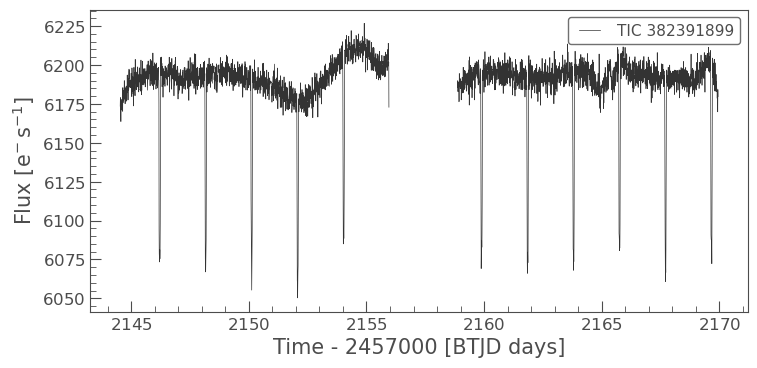

In [261]:
lcs[1].plot()

In [187]:
lc_combined = lcs.stitch(lambda x: x.remove_nans().remove_outliers(sigma=3.0).normalize())

In [258]:
lc_combined

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,,,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1410.953531534125,1.0016549e+00,4.7702662e-04,5.0713364e-03,8807,2023.38262,671.63832,5.5566040e+03,2.5508912e+00,1.3212648e+03,9.3030214e-01,6.2650864e+03,2.9836752e+00,0,nan,nan,nan,nan,2023.38262,3.5472744e-04,671.63832,3.4198278e-04,1.7395616e-01,-6.5861329e-02
1411.0160328776744,1.0026792e+00,4.7703626e-04,5.0727054e-03,8810,2023.38274,671.63938,5.5559033e+03,2.5509424e+00,1.3203771e+03,9.2924196e-01,6.2714932e+03,2.9837356e+00,1000000000,nan,nan,nan,nan,2023.38274,3.5507735e-04,671.63938,3.4230645e-04,1.7488852e-01,-6.5621160e-02
1411.0368666555985,1.0032743e+00,4.7717855e-04,5.0731585e-03,8811,2023.38283,671.63876,5.5555483e+03,2.5517035e+00,1.3214486e+03,9.3088424e-01,6.2752153e+03,2.9846256e+00,0,nan,nan,nan,nan,2023.38283,3.5496557e-04,671.63876,3.4266122e-04,1.7486960e-01,-6.6337854e-02
1411.057700431659,9.9996197e-01,4.7644725e-04,5.0736098e-03,8812,2023.38295,671.63885,5.5355669e+03,2.5477929e+00,1.3218965e+03,9.3013680e-01,6.2544976e+03,2.9800515e+00,0,nan,nan,nan,nan,2023.38295,3.5582905e-04,671.63885,3.4357168e-04,1.7546071e-01,-6.5822899e-02
1411.141035518672,1.0030593e+00,4.7713603e-04,5.0753974e-03,8816,2023.38293,671.64046,5.5516440e+03,2.5514760e+00,1.3214919e+03,9.3057370e-01,6.2738706e+03,2.9843595e+00,0,nan,nan,nan,nan,2023.38293,3.5520334e-04,671.64046,3.4320611e-04,1.7576145e-01,-6.3954927e-02
1411.1618692863515,1.0025188e+00,4.7688300e-04,5.0758403e-03,8817,2023.38307,671.63990,5.5510142e+03,2.5501230e+00,1.3212809e+03,9.3090165e-01,6.2704897e+03,2.9827769e+00,0,nan,nan,nan,nan,2023.38307,3.5498835e-04,671.63990,3.4283393e-04,1.7579900e-01,-6.4292058e-02
1411.1827030521674,1.0023277e+00,4.7679327e-04,5.0762813e-03,8818,2023.38306,671.63918,5.5480640e+03,2.5496430e+00,1.3208563e+03,9.3091512e-01,6.2692944e+03,2.9822156e+00,0,nan,nan,nan,nan,2023.38306,3.5504482e-04,671.63918,3.4308087e-04,1.7631043e-01,-6.5552875e-02
1411.2035368165866,1.0017500e+00,4.7693352e-04,5.0767208e-03,8819,2023.38310,671.64039,5.5476860e+03,2.5503931e+00,1.3233372e+03,9.3072510e-01,6.2656812e+03,2.9830930e+00,0,nan,nan,nan,nan,2023.38310,3.5520564e-04,671.64039,3.4309208e-04,1.7556259e-01,-6.3226789e-02


17.184769289194065


<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='Power'>

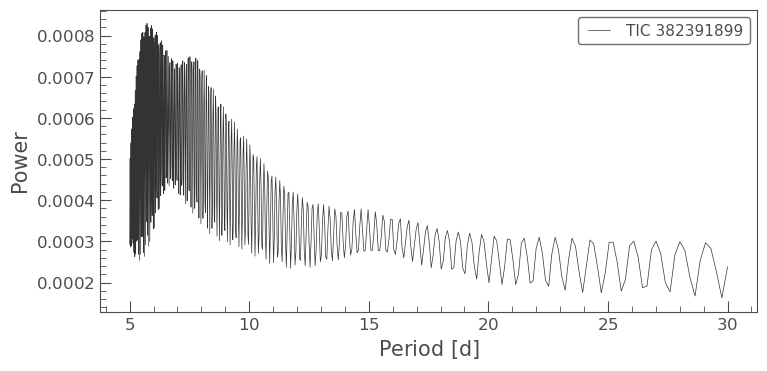

In [213]:
pg = lc_combined.to_periodogram(minimum_period=5, maximum_period=30)
print(pg.period_at_max_power.value * 3)
pg.plot()

17.74732712718283


array([13.08689705, 13.83450147, 15.5220008 ])

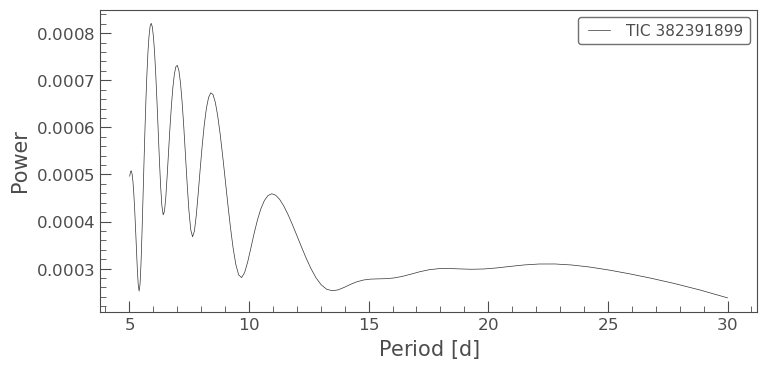

In [264]:
pg = lc_combined.to_periodogram(minimum_period=5, maximum_period=30, oversample_factor=1)
print(pg.period_at_max_power.value * 3)
pg.plot()

probabilities = [0.1, 0.05, 0.01]
pg._LS_object.false_alarm_level(probabilities)

In [16]:
r = SIP(`lcs)

/home/mango/miniconda3/envs/WASP50/lib/python3.9/site-packages/lightkurve/lightcurve.py:1031: LightkurveWarning: The light curve appears to be zero-centered (median=1.40e+03 electron / s +/- 7.57e+03 electron / s); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(


Lightcurve File Input


Running pixels in aperture: 100%|██████████| 300/300 [00:01<00:00, 160.92it/s]


In [18]:
r.keys()

dict_keys(['periods', 'power', 'raw_lc', 'power_bkg', 'raw_lc_bkg', 'corr_lc', 'period_at_max_power', 'model'])

/home/mango/miniconda3/envs/WASP50/lib/python3.9/site-packages/lightkurve/lightcurve.py:1051: LightkurveWarning: The light curve already appears to be in relative units; `normalize()` will convert the light curve into relative units for a second time, which is probably not what you want.
  warnings.warn(


(1400.0, 1450.0)

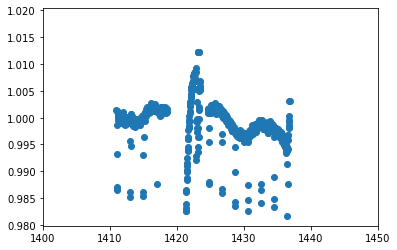

In [23]:
lc_corr = r["corr_lc"].remove_nans().remove_outliers().normalize()

plt.scatter(lc_corr.time.value, lc_corr.flux)
plt.xlim(1400, 1450)

In [3]:
t, f, f_err = np.genfromtxt(
    "/home/mango/Desktop/WASP50LC_ASASSN_binned.txt",
    unpack=True,
    delimiter=',',
    skip_header=1,
)

In [24]:
data = {
    "time":t,
    "flux":f,
    "flux_err":f_err,
}
lc_ASASSN = lk.LightCurve(data=data)
lc_ASASSN

time,flux,flux_err
,,
object,float64,float64
6654.8107259650715,-0.0008682310469305676,0.01414213562373095
6674.800516657066,0.002631768953069269,0.02
6887.064640546373,-0.0010348977135977342,0.011547005383792516
6895.05657414797,-0.0030348977135972177,0.011547005383792516
6902.688494404622,0.00196510228640238,0.011547005383792516
6909.476019632304,0.000631768953068601,0.01414213562373095
6921.023825019482,-0.00461823104693071,0.01
6943.5004607709125,-0.0033682310469309584,0.01414213562373095


<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='Power'>

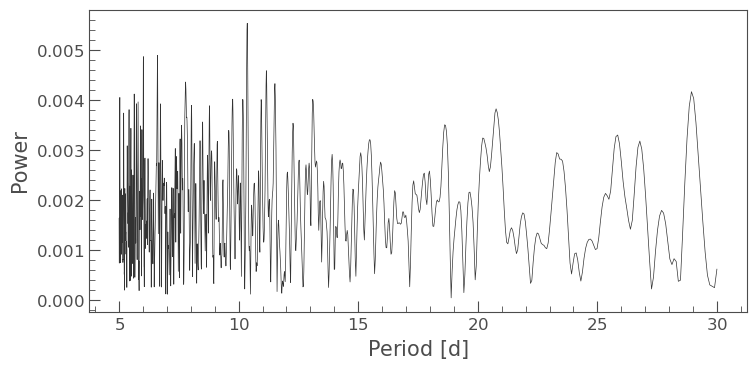

In [33]:
pg_ASASSN = lc_ASASSN.to_periodogram(minimum_period=5.0, maximum_period=30.0)
pg_ASASSN.plot()

In [ ]:
lc = lcs[0].remove_nans().normalize().remove_outliers()

In [ ]:
pg = lc.to_periodogram(minimum_period = 1.5,
                      maximum_period = 2.5,
                      oversample_factor=100)
pg.plot(view='period');

In [ ]:
new_period = pg.period_at_max_power
new_period

In [ ]:
plt.scatter(lc.time.value, lc.flux.value)

In [ ]:
lc_ASASN = lk.LightCurve()